In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
data = {
    'Study Hours': ['Low', 'High', 'High', 'Low', 'High'],
    'Attendance': ['Poor', 'Good', 'Poor', 'Good', 'Good'],
    'Result': ['Fail', 'Pass', 'Pass', 'Fail', 'Pass']
}
df = pd.DataFrame(data)
df_enc = df.copy()

In [4]:
le_study = LabelEncoder()
le_att = LabelEncoder()
le_res = LabelEncoder()

df_enc['Study Hours Enc'] = le_study.fit_transform(df_enc['Study Hours'])
df_enc['Attendance Enc'] = le_att.fit_transform(df_enc['Attendance'])
df_enc['Result Enc'] = le_res.fit_transform(df_enc['Result'])


In [5]:
X = df_enc[['Study Hours Enc', 'Attendance Enc']]
y = df_enc['Result Enc']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


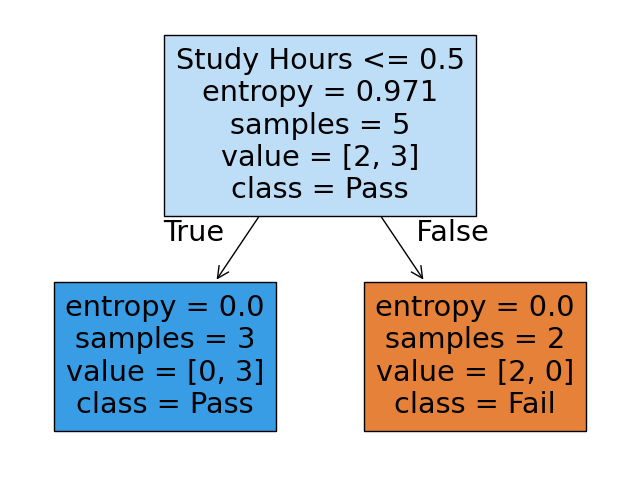

In [6]:
plt.figure(figsize=(8, 6))
plot_tree(model, feature_names=['Study Hours', 'Attendance'], class_names=['Fail', 'Pass'], filled=True)
plt.show()

In [7]:
new_student = [[le_study.transform(['Low'])[0], le_att.transform(['Good'])[0]]]
prediction = model.predict(new_student)
predicted_result = le_res.inverse_transform(prediction)
print("Prediction for (Study Hours=Low, Attendance=Good):", predicted_result[0])

Prediction for (Study Hours=Low, Attendance=Good): Fail


e:\University\Semster 5\AI Lab\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:

df = pd.read_csv('Iris.csv')
print("Dataset Columns:", df.columns)
df.head()

Dataset Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:

if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
X = df.drop('Species', axis=1) 
y = df['Species']           

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print("Pre-processing complete!")
print("Classes identified:", le.classes_)

Pre-processing complete!
Classes identified: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 105
Testing set size: 45


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


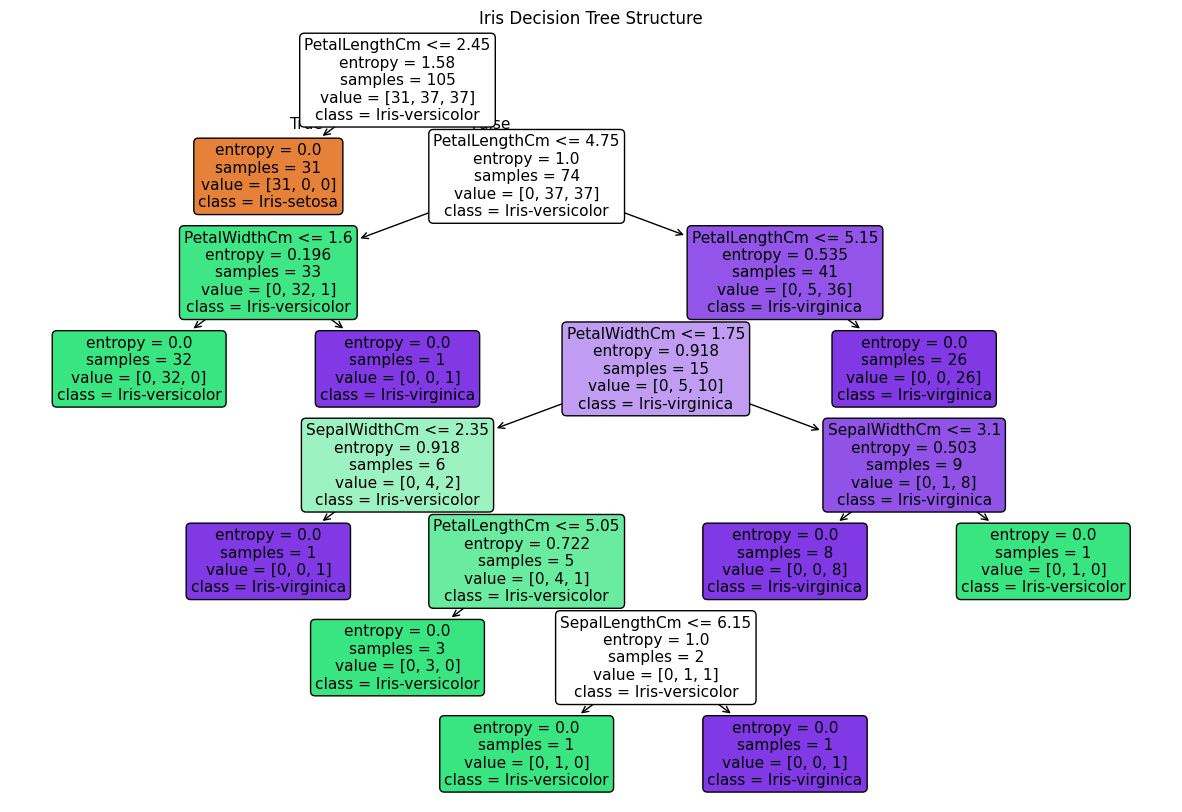

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=list(le.classes_), 
          filled=True, 
          rounded=True)

plt.title("Iris Decision Tree Structure")
plt.show()

In [14]:
#Ques4
df_mnist = pd.read_csv('train.csv')

In [15]:
print("Data Shape:", df_mnist.shape)
df_mnist.head()

Data Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_mnist = df_mnist.drop('label', axis=1).values
y_mnist = df_mnist['label'].values

X_mnist = X_mnist / 255.0

X_small = X_mnist[:10000]
y_small = y_mnist[:10000]

print("Features (X) and Labels (y) are separated and normalized!")

Features (X) and Labels (y) are separated and normalized!


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Decision Tree (max_depth=10 taake overfit na ho)
mnist_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
mnist_clf.fit(X_train, y_train)

# Accuracy check
y_pred = mnist_clf.predict(X_test)
print(f"MNIST Decision Tree Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

MNIST Decision Tree Accuracy: 80.75%


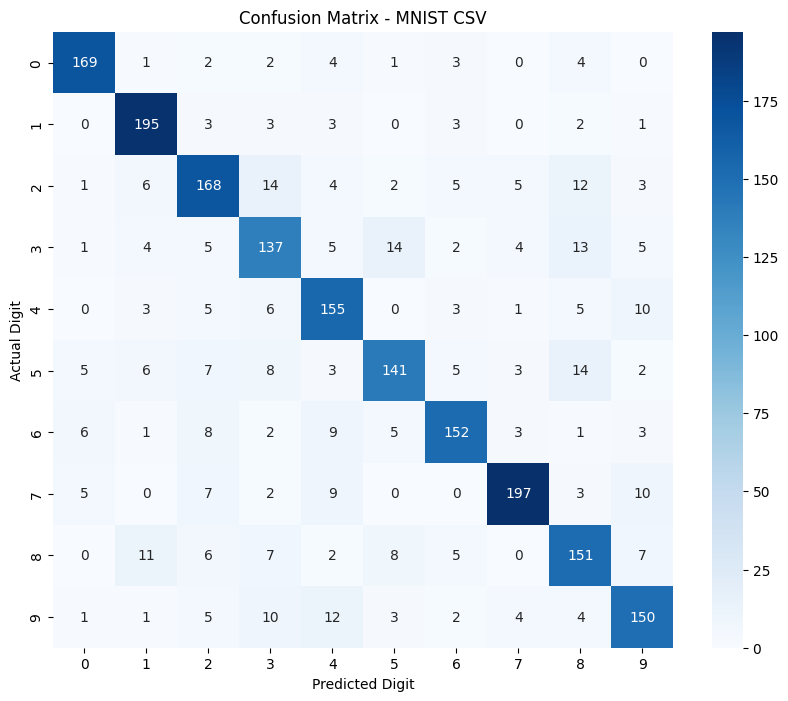

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix - MNIST CSV')
plt.show()